# Teoria

Klasyfikatory Haara są jedną z wielu wbudowanych bibliotek wewnętrznych OpenCV. Algorytm w nich stosowany został opracowany stosunkowo dawno (w 2001 roku), a za jego pomocą  po  raz  pierwszy  udało  się  wykryć  twarz  na  obrazie  wyświetlanym  w  czasie rzeczywistym. Zawdzięcza  swoją  nazwę  węgierskiemu  matematykowi  Alfredowi  Haarowi, który opisał transformację  falkową,  bardzo  podobną  do  transformaty  Fouriera,  jednak korzystającąze  zbioru  funkcji  kwadratowych  a  nie  sinusoidalnych.  Jako  efekt  transformacji otrzymujemy  tak  zwaną  falkę,  której  współczynniki  są  miarą  podobieństwa  pomiędzy sąsiednimi fragmentami sygnału. Oprogramowanie  rozpoznające  dany  obiekt  jest  oparte  właśnie  na falkach  Haara. Uwzględnia ono sąsiadujące regiony pikseli, sumuje ich intensywność, a następnie porównuje z regionami sąsiadującymi i oblicza różnice pomiędzy nimi. W przypadku cech szczególnych każdej ludzkiej twarzy, można wyróżnić to, że obszar oczu jest ciemniejszy niż obszar dwóch policzków. Wiadomo także, że twarz ma dokładnie dwatakie obszary położone na  jednej  wysokości.  Właśnie  takie  cechy  wykrywa  i  rozpoznaje  odpowiednio  wyuczony klasyfikator.

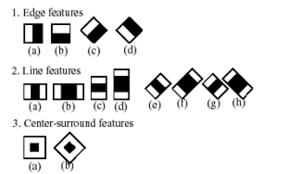

Aby  wytrenować  klasyfikator,  czyli  nauczyć  go  wykrywania  pożądanych  obiektów korzystając z obszarów intensywności, musimy dostarczyć mu dość dużą ilość danych. Na dane składają się zdjęcia pozytywne (ang. positive images), które mają zawierać wyłącznie element, który  ma  być  rozpoznawany  przez klasyfikator  (są  one  zawsze  skalowane  do  jednego rozmiaru),  oraz  negatywne  (ang.  negativeimages),  które  są  dowolnymi  obrazami  bez szukanego elementu. Szkolenie klasyfikatora może trwać nawet kilka dni w zależności od rozmiaru i ilości zdjęć znajdujących się w bazie danych. Po  wytrenowaniu  klasyfikatora  otrzymujemy  tak  zwaną  kaskadę.  Oznaczato,  że wynikowy klasyfikator składa się z kilku prostszych, które mają za zadanie wykryć konkretny obszar  intensywności.  Te  z  kolei  mogą  składać  się  z  jeszcze  mniejszych  algorytmów. Najbardziej  podstawowym  klasyfikatorem  jest  drzewko  decyzyjne  o  co  najmniej  dwóch liściach.    Gdy  kilka  wewnętrznych  klasyfikatorów  wykryje  charakterystyczną  cechę, klasyfikator wynikowy zwraca informację o znalezieniu obiektu. Bardzo dużą zaletą klasyfikatorów Haara jest to, że mogąonew łatwy sposób wykrywać obiekty o różnych rozmiarach. Nie trzeba zatem zmieniać wymiarów samego obrazu. W tym celu algorytm wykonuje procedurę skanowania kilka razy w różnych skalach. Metoda ta jest bardzo efektywna i można ją stosować w czasie rzeczywistym. Jako wadę tego rozwiązania można  uznać  dość  dużą  niedokładność  i  pomyłki.  Nie  nadaje  się  ona  do  bardziej skomplikowanych zagadnień.  Kolejnym  problemem  jest  bardzo  długi  czas  szkolenia pojedynczego klasyfikatora.

# Pobieranie bibliotek

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Pobieranie zdjęć



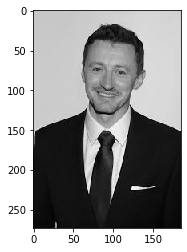

In [2]:
#  Loading the image to be tested
test_image = cv2.imread('agh_cv/czlowiek.png')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
imshow(test_image_gray)

Wiemy, że funkcje w OpenCV domyślnie zapisują obraz w formacie BGR, korzystamy więc z wczoraj napisanej funkcji do transformacji i wyświetlenia plików

# Pliki z kaskadą Haara

OpenCV jest wyposażony w wiele wstępnie przeszkolonych klasyfikatorów. Na przykład istnieją klasyfikatory uśmiechu, oczu, twarzy itp. Są to pliki w formacie xml i znajdują się w folderze `agh_cv/ haarcascades / haarcascades /`. Aby jednak uprościć sprawę, możesz również uzyskać do nich dostęp z tego miejsca. Pobierz pliki xml i umieść je w folderze danych w tym samym katalogu roboczym, co notatnik jupyter.

### Załaduj klasyfikator rozpoznający twarz

In [ ]:
haar_cascade_face = cv2.CascadeClassifier('agh_cv/haarcascades/haarcascade_frontalface_alt2.xml')


# Detekcja twarzy

Będziemy korzystać z modułu wykrywacza klasyfikującego DetectMultiScale. Ta funkcja zwróci współrzędne (pozycja xiy plus wysokość i szerokość) wykrytych powierzchni jako prostokąt (x, y, w, h).


In [4]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



        

Faces found:  1


Naszym następnym krokiem jest zapętlenie wszystkich zwróconych współrzędnych i narysowanie wokół nich prostokątów za pomocą Open CV. Narysujemy zielony prostokąt o grubości 2

In [5]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        

Na koniec wyświetlimy oryginalny obraz w kolorze, aby sprawdzić, czy twarz została poprawnie wykryta.



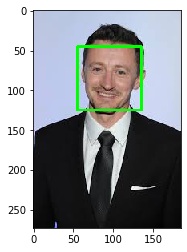

In [6]:
imshow(test_image)

### Zadanie: Stwórz funkcję która pobiera klasyfikator, zdjęcie, a zwraca zdjęcie z ramką (to co wyżej, tylko zamknięte w funkcję)

In [7]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return image_copy

### Nowy obrazek



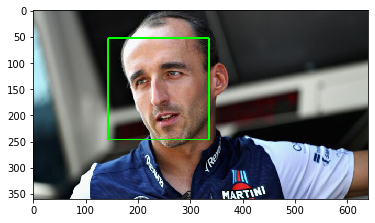

In [8]:
#loading image
test_image2 = cv2.imread('agh_cv/czlowiek2.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
imshow(faces)


### Zdjęcie grupowe - ile wykryto twarzy?

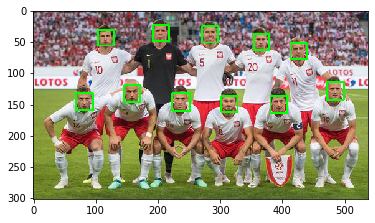

In [9]:
#loading image
test_image2 = cv2.imread('agh_cv/grupa.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
imshow(faces)


## Zadanie: wczytaj klasyfikator wyszukujący oczy. Sprawdź jego działanie

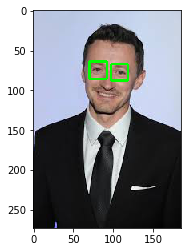

In [10]:
#loading image
test_image2 = cv2.imread('agh_cv/czlowiek.png')

eye_class = cv2.CascadeClassifier('agh_cv/haarcascades/haarcascade_eye.xml')

#call the function to detect faces
eyes = detect_faces(eye_class, test_image2)

#convert to RGB and display image
imshow(eyes)